# Data Distribution Analysis


#### This analysis help you to check how the data is distributed

In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [2]:
data = pd.read_csv('../DATA/adult_new.csv', sep=',')
data.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,state_gov,bachelors,unmarried,adm-clerical,other_relative,white,male,2174,0,40,united-states,<=50k
1,50,self_emp_not_inc,bachelors,married,exec-managerial,husband,white,male,0,0,13,united-states,<=50k
2,38,private,hs_grad,divorced,handlers-cleaners,other_relative,white,male,0,0,40,united-states,<=50k
3,53,private,hs_grad,married,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
4,28,private,bachelors,married,prof-specialty,wife,black,female,0,0,40,cuba,<=50k
5,37,private,master,married,exec-managerial,wife,white,female,0,0,40,united-states,<=50k
6,49,private,below_hs_grad,separated,other-service,other_relative,black,female,0,0,16,jamaica,<=50k
7,52,self_emp_not_inc,hs_grad,married,exec-managerial,husband,white,male,0,0,45,united-states,>50k
8,31,private,master,unmarried,prof-specialty,other_relative,white,female,14084,0,50,united-states,>50k
9,42,private,bachelors,married,exec-managerial,husband,white,male,5178,0,40,united-states,>50k


In [3]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [4]:
neumeric_cols = data.dtypes[data.dtypes == 'int64'].index
object_cols = data.dtypes[data.dtypes == 'object'].index

In [5]:
data.describe()

,age,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


## Check if the dataset is balanced or not.

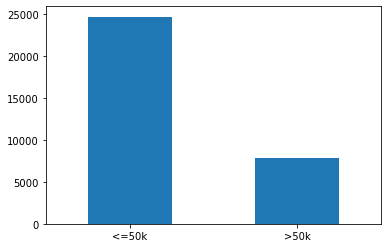

In [6]:
count_classes = pd.value_counts(data['salary'], sort=True)

count_classes.plot(kind='bar', rot=0)
plt.show()

In [7]:
class_0 = data['salary'].value_counts()[0]
class_1 = data['salary'].value_counts()[1]

per_cls_0 = class_0 / (class_0 + class_1)
per_cls_1 = class_1 / (class_0 + class_1)

print(f"Percentage of class 0: {np.round(per_cls_0 * 100)} \n\nPercentage of class 1: {np.round(per_cls_1 * 100)}")

Percentage of class 0: 76.0 

Percentage of class 1: 24.0


## Create a function to check wheather the data is normally distributed or not:
#### using KDE Plot and QQ Plot

In [8]:
def KDE_Plot(data, col, hue=None):
    plt.figure(figsize=(12,5))
    sns.kdeplot(data=data, x=col, hue=hue, multiple="stack")
    plt.show()
    

def QQ_Plot(data, col):
    plt.figure(figsize=(12,5))
    stats.probplot(data[col], dist='norm',plot=pylab)
    plt.show()

## Check is a particular feature is normally distributed.

In [9]:
neumeric_cols

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

### for age columns

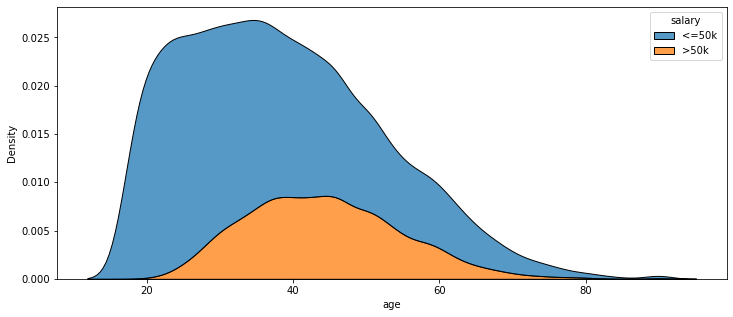

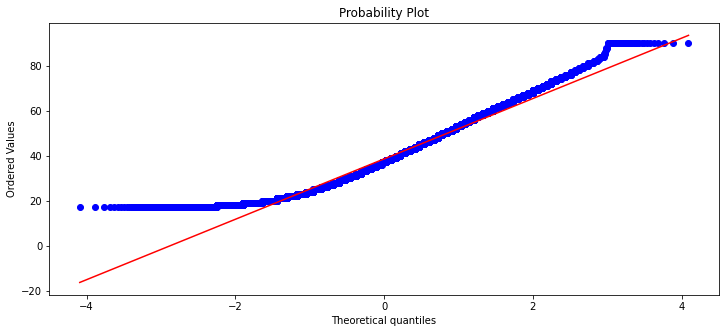

In [10]:
KDE_Plot(data=data, col='age', hue='salary')
QQ_Plot(data, 'age')

### for "capital-gain" column

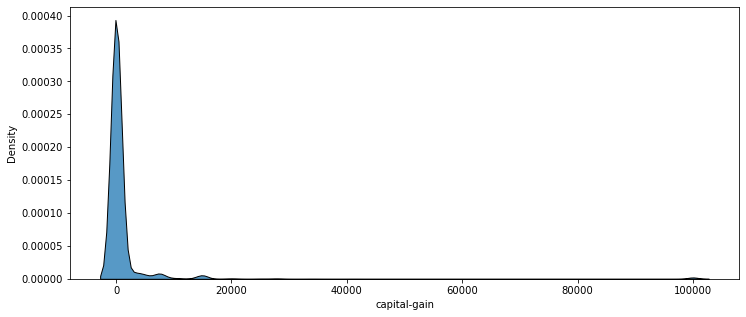

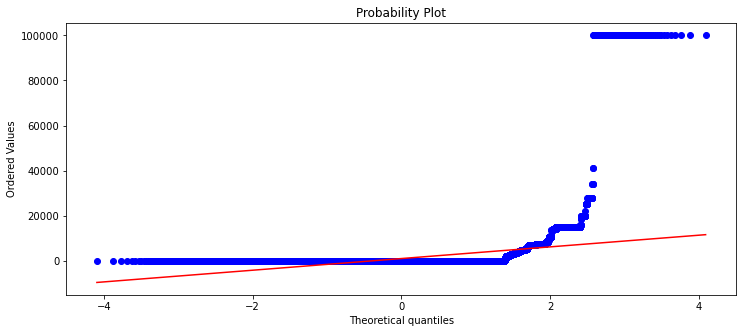

In [11]:
KDE_Plot(data=data, col='capital-gain')
QQ_Plot(data, 'capital-gain')

### for "capital-loss" column

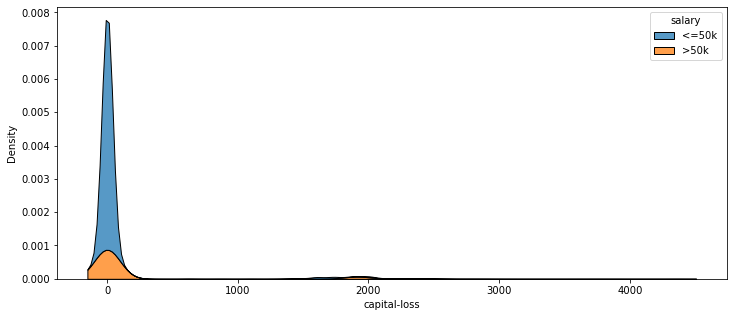

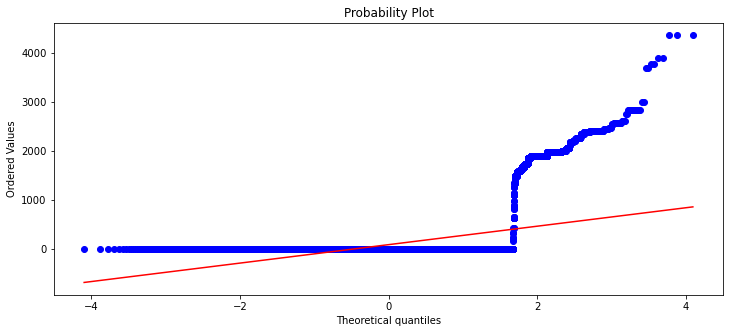

In [12]:
KDE_Plot(data=data, col='capital-loss', hue='salary')
QQ_Plot(data, 'capital-loss')

### for "hours-per-week" column

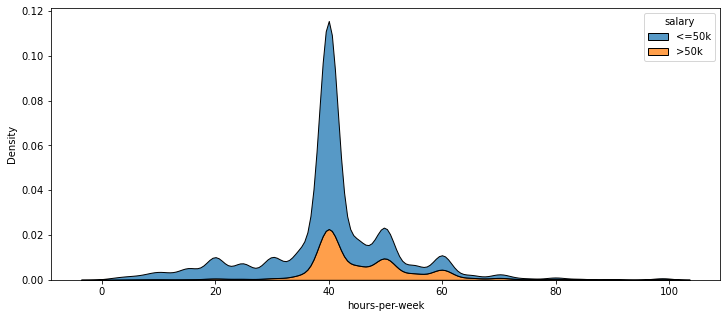

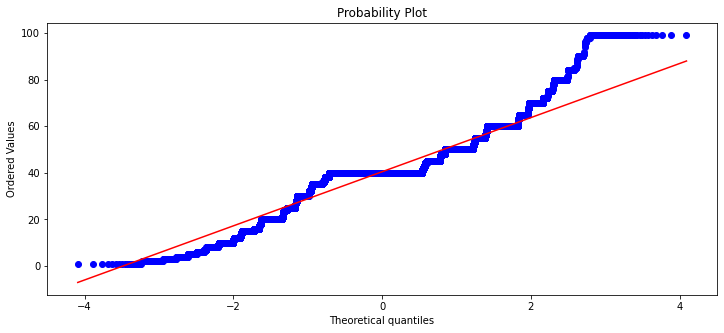

In [13]:
KDE_Plot(data=data, col='hours-per-week', hue='salary')
QQ_Plot(data, 'hours-per-week')

## Conclusion:
    
* all the neumeric features are not Normally Distributed.